In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Question 3: One dimensional interpolation and application
#### a) Linear interpolation

In [5]:
x = np.linspace(1,20,7)
x_true = np.linspace(1,30,1000)

In [6]:
def fx(x):
    return 2*x*np.sin(0.8*x)

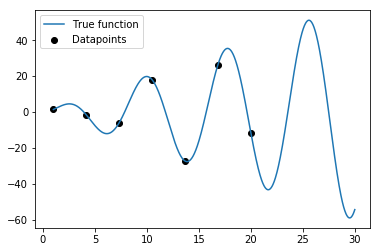

In [7]:
plt.title('')
plt.plot(x_true, fx(x_true),label='True function')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.legend()

In [8]:
def linear_interpolation(x, f, num_values, begin, end):
    """
    Interpolate given 'x' values and function 'f' at 'num_values' linearly separated between 'begin' and 'end'
    """
    # y values
    y = f(x)
    # interpolated y values
    y_values = []
    # interpolated x values
    x_values = np.linspace(begin,end,num_values)

    
    # Interpolation
    for i in range(len(x)-1):
        # calculate slope between two points
        a = ( y[i+1] - y[i] ) / (x[i+1] - x[i])
        # take only x values between two points
        x_values_now = x_values[(x_values >= x[i]) & (x_values < x[i+1])]
        # calculate y values as linear interpolation
        y_values += list(y[i] + (x_values_now - x[i])*a)
        
    # Extrapolation, is simply extrapolating final bin
    x_values_now = x_values[(x_values >= x[i+1])]
    y_values += list(y[i] + (x_values_now - x[i])*a)
    
    return x_values, np.asarray(y_values)



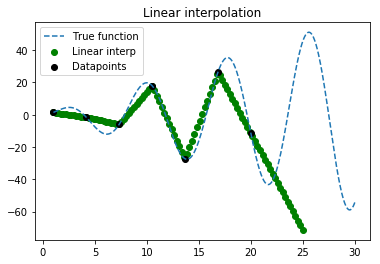

In [9]:
x_values, y_values = linear_interpolation(x,fx, 100, 1, 25)
plt.scatter(x_values,y_values,label='Linear interp',c='g')
plt.plot(x_true, fx(x_true),label='True function', ls='dashed')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation')
plt.show()

#### a) Polynomial interpolation (Neville's algorithm)

In [10]:
def recurrence_relation(i, j, x, all_x, f):
    """
    Neville's algorithm recurrence relation
    i,j -- int   -- index of the datapoints 
    x   -- float -- x value to evaluate
    all_x -- array -- data points x
    f   -- function -- function that calculates y(x)
    """
    if i == j:
        # return y_i
        return f(all_x[i])
    else:
        # return the recursive relation
        return ( ((x - all_x[j])*recurrence_relation(i, j-1, x, all_x, f) 
         - (x-all_x[i])*recurrence_relation(i+1, j, x, all_x, f)) /
        (all_x[i] - all_x[j]) ) 

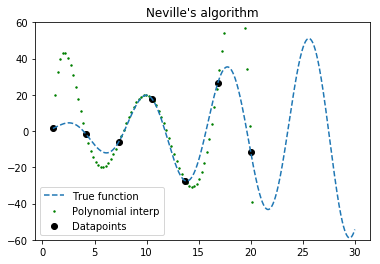

In [11]:
x_values = np.linspace(1, 25, 100)
# Calculate the y values accompanying the x values with Neville algorithm
y_values = [recurrence_relation(0,len(x)-1, x_values[i], x, fx) 
            for i in range(len(x_values)) ]

plt.scatter(x_values, y_values, label='Polynomial interp'
            , s=2,c='g')
#plt.plot(x_true, fx(x_true),label='True function', ls='dashed')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.plot(x_true, fx(x_true),label='True function', ls='dashed')
plt.legend()
plt.ylim(-60,60)
plt.title("Neville's algorithm")
plt.show()

#### a) Cubic spline

In [12]:
def cubic_spline_ABCD(j, x, all_x):
    """
    Return the coefficients ABCD for cubic spline interpolation
    j     -- int   -- index of datapoint
    x     -- float -- point to interpolate
    all_x -- array -- all sampled datapoints
    """
    
    A = (all_x[j+1] - x)/(all_x[j+1] - all_x[j])
    B = 1 - A
    C = 1./6 * (A**3 - A)*(all_x[j+1]-all_x[j])**2
    D = 1./6 * (B**3 - B)*(all_x[j+1]-all_x[j])**2
    
    return A, B, C, D

In [13]:
A, B, C, D = cubic_spline_ABCD(0, 3, x)

In [16]:
# def find_second_derivative(j, all_x, condition='natural'):
#     """
#     Find the second derivative by imposing that the first derivative 
#     is equal evaluated at xj in the interval [x_j-1, x_j] to the first
#     derivative evaluated at xj in the interval [x_j, x_j+1]
    
#     This results in N-2 equations with N unkowns
    
#     if condition = 'natural', we set the first and last second
#     derivative to zero as boundary conditions
#     """
    
#     # left hand side
#     lhs =  1/6.* (all_x[j] - all_x[j-1]) * 
    
    
    
    

## Testing some stuff for assignment 1

In [29]:
import scipy.interpolate as interpolate

In [28]:
def linear_interpolation(x, f, num_values, begin, end, logx=False):
    """
    Interpolate given 'x' values and function 'f' at 
    'num_values' linearly separated between 'begin' and 'end'
    if logx = True, use equal width x values in logspace
    
    The function always takes all x in linear space.
    Whether y is logspace is determined by the function 'f' 
    
    """
    # y values of the points that are given
    y = f(x)
    # interpolated y values
    y_values = []
    # interpolated x values
    if logx:
        # equal width in log space
        x_values = np.logspace(np.log10(begin),np.log10(end),num_values)
        # fit in log(x) space
        x_values = np.log(x_values)
        x = np.log(x)
    else:
        # fit in linear space
        x_values = linspace(begin,end,num_values)
    
    # Interpolation
    for i in range(len(x)-1):
        # calculate slope between two points
        a = ( y[i+1] - y[i] ) / (x[i+1] - x[i])
        # take only x values between two points
        x_values_now = x_values[(x_values >= x[i]) & (x_values < x[i+1])]
        # calculate y values as linear interpolation
        y_values += list(y[i] + (x_values_now - x[i])*a)
        
    # Extrapolation, is simply extrapolating final bin
    x_values_now = x_values[(x_values >= x[i+1])]
    y_values += list(y[i] + (x_values_now - x[i])*a)
    
    return x_values, np.asarray(y_values)

In [99]:
def densprofile(x, a, b, c, A=1, Nsat = 100, spherical=False):
    """
    Returns the density profile from the assignment
    
    a controls small-scale slope
    b contols transition scale
    c controls steepness of exponential dropoff
    spherical -- True to multiply by x**2 for the spherical integral
    """
    if spherical:
        power = 1
    else:
        power = 3
        
    return A*Nsat * (x/b)**(a-power) * np.exp( -(x/b)**c )

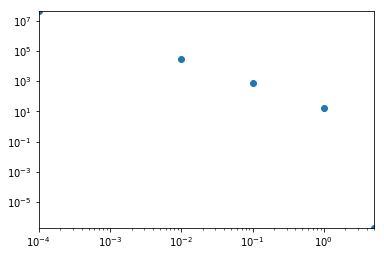

In [100]:
a, b, c = (1.3879482885811734, 1.9278450364977295, 2.901790176457339)
A = 0.06469019845387262
Nsat = 100

points = np.array([1e-4, 1e-2, 1e-1, 1, 5])
function = lambda x: densprofile(x,a,b,c,A=A,Nsat=Nsat,spherical=False)
ypoints = function(points)
plt.scatter(points,ypoints)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,5)
plt.ylim(ypoints[-1],ypoints[0])
plt.show();

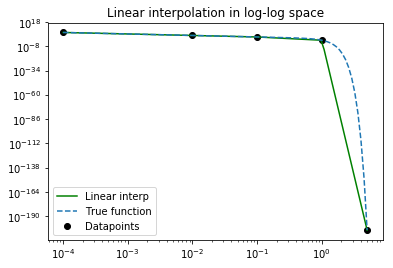

In [131]:
# Fit a linear model to the function in log-log space
#a, b, c = (1.3879482885811734, 1.9278450364977295, 2.901790176457339)
a, b, c = (1.3879482885811734, 0.6, 2.901790176457339)

A = 0.06469019845387262
Nsat = 100

function = lambda x: densprofile(x,a,b,c,A=A,Nsat=Nsat
                                     ,spherical=False)
points = np.array([1e-4, 1e-2, 1e-1, 1, 5])
logfunc = lambda x: np.log(function(x))

x_interp, y_interp = linear_interpolation(points,logfunc
                            , 100, 1e-4, 5, logx=True)
# Transform back to linear space
x_interp = np.exp(x_interp)
y_interp = np.exp(y_interp)

ypoints = function(points)

plt.plot(x_interp,y_interp,
            label='Linear interp',c='g')
plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation in log-log space')
plt.xscale('log')
plt.yscale('log')
plt.show();

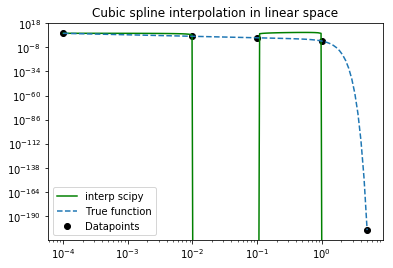

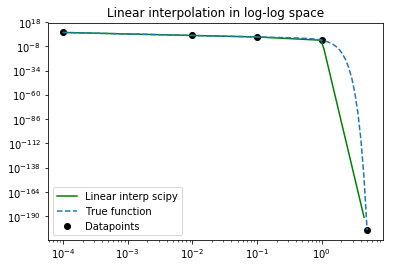

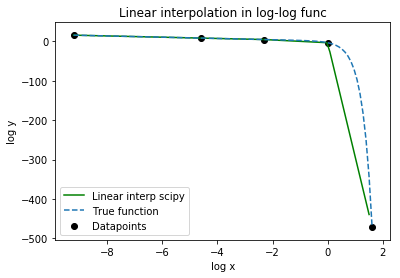

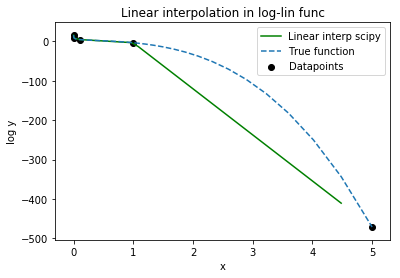

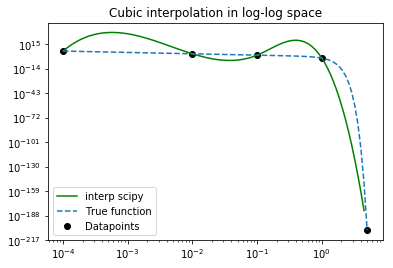

/home/erik/miniconda3/envs/kerastf/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log


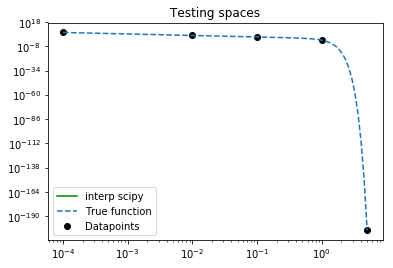

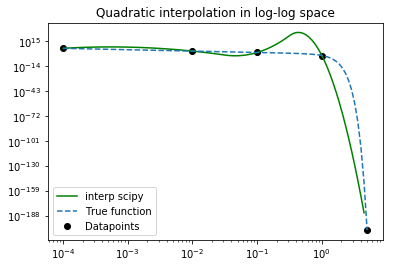

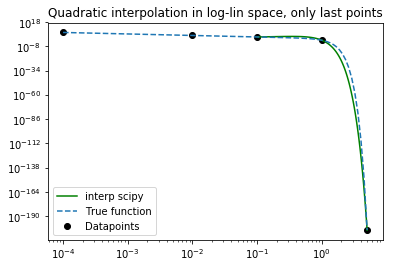

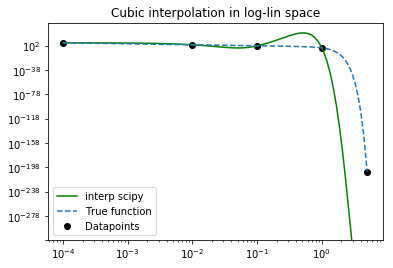

In [132]:
# Show cubic spline in normal space
scipy_func = interpolate.interp1d(points, function(points),kind='cubic')
x_interp_sp = x_interp[:-1]
y_interp_sp = scipy_func(x_interp_sp)

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Cubic spline interpolation in linear space')
plt.xscale('log')
plt.yscale('log')
plt.show();


# Construct interpolator with log x and log y
scipy_func = interpolate.interp1d(np.log(points),logfunc(points))
x_interp_sp = x_interp[:-1]
# Call interpolator with log x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(np.log(x_interp_sp)))

plt.plot(x_interp_sp, y_interp_sp,
            label='Linear interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation in log-log space')
plt.xscale('log')
plt.yscale('log')
plt.show();

# Construct interpolator with log x and log y
scipy_func = interpolate.interp1d(np.log(points),logfunc(points))
x_interp_sp = x_interp[:-1]
# Call interpolator with log x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(np.log(x_interp_sp)))

plt.plot(np.log(x_interp_sp), np.log(y_interp_sp),
            label='Linear interp scipy',c='g')

plt.plot(np.log(x_interp), np.log(function(x_interp)),label='True function', ls='dashed')
plt.scatter(np.log(points),np.log(ypoints), c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation in log-log func')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('log x')
plt.ylabel('log y')
plt.show();

# Construct interpolator with x and log y
scipy_func = interpolate.interp1d(points,logfunc(points))
x_interp_sp = x_interp[:-1]
# Call interpolator with x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(x_interp_sp))

plt.plot(x_interp_sp, np.log(y_interp_sp),
            label='Linear interp scipy',c='g')

plt.plot(x_interp, np.log(function(x_interp)),label='True function', ls='dashed')
plt.scatter(points,np.log(ypoints), c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation in log-lin func')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('x')
plt.ylabel('log y')
plt.show();

# Construct interpolator with log x and log y
scipy_func = interpolate.interp1d(np.log(points),logfunc(points),kind='cubic')
x_interp_sp = x_interp[:-1]
# Call interpolator with log x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(np.log(x_interp_sp)))

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Cubic interpolation in log-log space')
plt.xscale('log')
plt.yscale('log')
plt.show();

# Construct interpolator with log x and log log y
# For the last part of the function
newpoints = np.array([1.01, 5]) # Cheating a little
scipy_func = interpolate.interp1d(np.log(newpoints)
                                  ,np.log(logfunc(newpoints))
                                  ,kind='linear')
x_interp_sp = np.logspace(np.log10(newpoints[0]),np.log10(4.999),100)
# Call interpolator with log x, raise double exp to make linear again
y_interp_sp =  np.exp(np.exp(scipy_func(np.log(x_interp_sp))))

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Testing spaces')
plt.xscale('log')
plt.yscale('log')
plt.show();


# Construct interpolator with log x and log y
scipy_func = interpolate.interp1d(np.log(points),logfunc(points),kind='quadratic')
x_interp_sp = x_interp[:-1]
# Call interpolator with log x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(np.log(x_interp_sp)))

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Quadratic interpolation in log-log space')
plt.xscale('log')
plt.yscale('log')
plt.show();

# Construct interpolator with x and log y , only last 3 points
newpoints = points[-3:] 
scipy_func = interpolate.interp1d(newpoints,logfunc(newpoints),kind='quadratic')
x_interp_sp = np.linspace(newpoints[0],5,100)
# Call interpolator with x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(x_interp_sp))

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Quadratic interpolation in log-lin space, only last points')
plt.xscale('log')
plt.yscale('log')
plt.show();

# Construct interpolator with x and log y
scipy_func = interpolate.interp1d(points,logfunc(points),kind='cubic')
x_interp_sp = x_interp[:-1]
# Call interpolator with log x, raise exp to make linear again
y_interp_sp =  np.exp(scipy_func(x_interp_sp))

plt.plot(x_interp_sp, y_interp_sp,
            label='interp scipy',c='g')

plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Cubic interpolation in log-lin space')
plt.xscale('log')
plt.yscale('log')
plt.show();

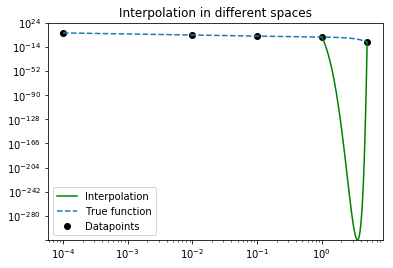

In [95]:
# Linear interpolation, 100 datapoints between first 4 datapoints
x_interp_lin, y_interp_lin = linear_interpolation(points[:4],logfunc
                            , 100, 1e-4, 1, logx=True)

# Cubic method between last 2 datapoints in log-lin space
# Construct interpolator with x and log y
scipy_func = interpolate.interp1d(points[:],logfunc(points[:]),kind='cubic')
# 100 datapoints between last 2 datapoints
x_interp_sp = np.linspace(1,5,100)

# Call interpolator withx, raise exp(y) to make linear again
y_interp_sp = scipy_func((x_interp_sp))

# Combine them, transform first part of x and full part of y
# to linear space

x_interp = np.append(np.exp(x_interp_lin),x_interp_sp)
y_interp = np.append(np.exp(y_interp_lin),np.exp(y_interp_sp))

plt.plot(x_interp_sp,np.exp(y_interp_sp),
            label='Interpolation',c='g')
plt.plot(x_interp, function(x_interp),label='True function', ls='dashed')
plt.scatter(points,ypoints, c='k',label='Datapoints')
plt.legend()
plt.title('Interpolation in different spaces')
plt.xscale('log')
plt.yscale('log')
plt.show();


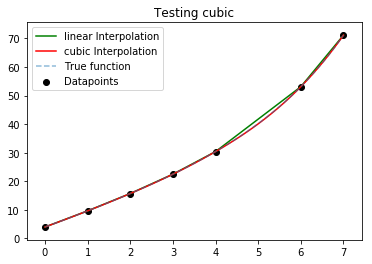

In [96]:
# Simple function that is linear to test cubic spline
testfunc = lambda x : 5*x+3 + np.exp(x/2)
points = np.array([0,1,2,3,4,6,7])

x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,testfunc(points),kind='linear')
y_interp_sp = scipy_func(x_interp_sp)
plt.plot(x_interp_sp,y_interp_sp,
            label='linear Interpolation',c='g')


x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,testfunc(points),kind='cubic')
y_interp_sp = scipy_func(x_interp_sp)
plt.plot(x_interp_sp,y_interp_sp,
            label='cubic Interpolation',c='r')

plt.plot(x_interp_sp, testfunc(x_interp_sp),label='True function', ls='dashed',alpha=0.5)
plt.scatter(points,testfunc(points), c='k',label='Datapoints')
plt.legend()
plt.title('Testing cubic')
plt.savefig('./testing.pdf')
plt.show();



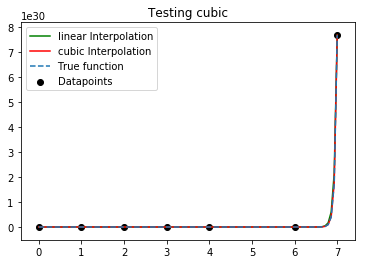

In [97]:
# Simple function that is linear in log-lin space
# to test cubic spline

testfunc = lambda x : np.exp(5*x+3 + np.exp(x/2) )

points = np.array([0,1,2,3,4,6,7])

x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,np.log(testfunc(points)),kind='linear')
y_interp_sp = scipy_func(x_interp_sp)
y_interp_sp = np.exp(y_interp_sp) # Transform back to lin space
plt.plot(x_interp_sp,y_interp_sp,
            label='linear Interpolation',c='g')


x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,np.log(testfunc(points)),kind='cubic')
y_interp_sp = np.exp(scipy_func(x_interp_sp))
plt.plot(x_interp_sp,y_interp_sp,
            label='cubic Interpolation',c='r')

plt.plot(x_interp_sp, testfunc(x_interp_sp),label='True function', ls='dashed')
plt.scatter(points,testfunc(points), c='k',label='Datapoints')
plt.legend()
plt.title('Testing cubic')
plt.savefig('./testing2.pdf')
plt.show();



In [ ]:
# Simple function that is linear in log-log space
# to test cubic spline

testfunc = lambda x : np.exp(5*x+3 + np.exp(x/2) )

points = np.array([0,1,2,3,4,6,7])

x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,np.log(testfunc(points)),kind='linear')
y_interp_sp = scipy_func(x_interp_sp)
y_interp_sp = np.exp(y_interp_sp) # Transform back to lin space
plt.plot(x_interp_sp,y_interp_sp,
            label='linear Interpolation',c='g')


x_interp_sp = np.linspace(0,7,100)
scipy_func = interpolate.interp1d(points,np.log(testfunc(points)),kind='cubic')
y_interp_sp = np.exp(scipy_func(x_interp_sp))
plt.plot(x_interp_sp,y_interp_sp,
            label='cubic Interpolation',c='r')

plt.plot(x_interp_sp, testfunc(x_interp_sp),label='True function', ls='dashed')
plt.scatter(points,testfunc(points), c='k',label='Datapoints')
plt.legend()
plt.title('Testing cubic')
plt.savefig('./testing2.pdf')
plt.show();

